In [ ]:
import numpy as np

In [1]:
from sympy import *
init_printing()
x, a = symbols('x a')

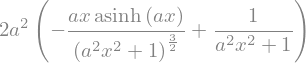

In [2]:
diff((asinh(a*x))**2,x,2)

In [3]:
# https://docs.sympy.org/latest/tutorials/intro-tutorial/basic_operations.html#substitution

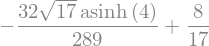

In [4]:
diff((asinh(a*x))**2,x,2).subs({'x':2, 'a':2})

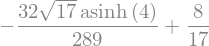

In [5]:
diff((asinh(a*x))**2,x,2).subs([(x, 2), (a, 2)])

In [6]:
diff((asinh(a*x))**2,x,2).subs([(x, 2), (a, 2)]).evalf(chop=True)

In [7]:
# more efficient and numerically stable to do evalf(subs)
diff((asinh(a*x))**2,x,2).evalf(subs={'x':2, 'a':2}, chop=True)

In [8]:
# more efficient way using numpy and sympy's lambdify
# https://docs.sympy.org/latest/tutorials/intro-tutorial/basic_operations.html#lambdify

In [10]:
expr = diff((asinh(a*x))**2,x,2)
# expr = diff((asinh(a*x)),x,1)

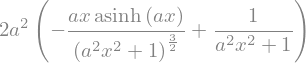

In [11]:
expr

In [12]:
f = lambdify((x,a), expr, "numpy") 

In [13]:
f(1, 1)

In [14]:
x_tst = np.linspace(-10, 10, 100)

In [15]:
import matplotlib.pyplot as plt

In [16]:
%%timeit
f(x_tst, 1)

9.34 µs ± 55.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


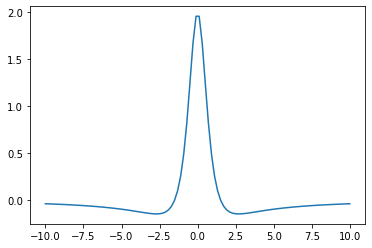

In [17]:
plt.plot(x_tst, f(x_tst, 1))

# generic function

given a mathematical function write a python function to compute the symbolic derivative and return a numpy function you can evaluate

In [17]:
import matplotlib.pyplot as plt

In [18]:
import numpy as np

In [19]:
# from sympy import *
# init_printing()
# x, a = symbols('x a')

import sympy
x_sym, a_sym = sympy.symbols('x_sym a_sym')

In [20]:
def fx(fn, a, x, p, d):
    """
    fn: sympy function
    a: sympy symbol
    x: sympy symbol
    p: numeric
    """
    return sympy.diff( fn(a*x)**p, x, d )

In [21]:
def lambdify_fx(fn, a, x, p, d):
    """
    builds a python function of (x, a)
    """
    if p == 0 and d == 0:
        # when the power is zero and the derivative is zero the result is 1
        return lambda x, a: np.ones_like(x)
    elif p == 0 and d > 0:
        # when the power is zero and the derivative is greater than zero the result is 0
        return lambda x, a: np.zeros_like(x)
    expr = fx(fn, a, x, p, d)
    return sympy.lambdify((x, a), expr, "numpy")

In [22]:
fx(sympy.asinh, a_sym, x_sym, 1, 1).subs({'x':2, 'a':1}).evalf()

a_sym/(a_sym**2*x_sym**2 + 1.0)**0.5

In [23]:
lambdify_fx(sympy.asinh, a_sym, x_sym, 1, 1)(np.array([1,2]),1)

array([0.70710678, 0.4472136 ])

In [24]:
x_tst = np.linspace(-2, 2, 1000)

Text(0.5, 1.0, 'derivative = 1')

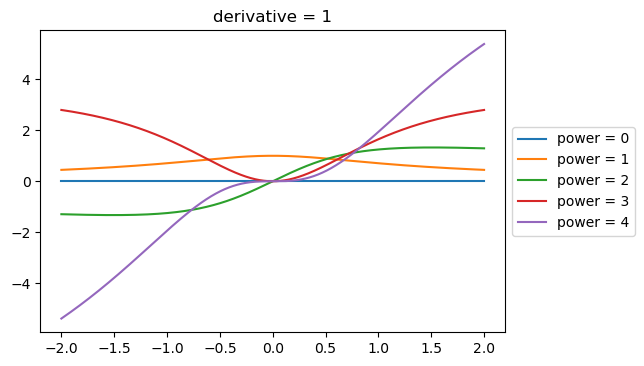

In [26]:
a = 1
d = 1
ps = np.arange(0, 5)
plt.figure(dpi=100)
for p in ps:
    plt.plot(x_tst, lambdify_fx(sympy.asinh, a_sym, x_sym, p, d)(x_tst, a), label=f"power = {p}")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f"derivative = {d}")